In [1]:
#Importing libraries
!pip install tensorflow
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data

In [3]:
url = "https://raw.githubusercontent.com/VimalVarun/Dara-set/main/Alphabets_data.csv"

In [4]:
df = pd.read_csv(url)

In [5]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [6]:
#EDA (Exploratory Data Analysis)

In [7]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [8]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [9]:
df.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [11]:
df.duplicated().sum()

1332

In [12]:
df[df.duplicated()]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7
724,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
730,I,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8
910,X,5,11,6,8,2,7,7,5,4,7,6,8,3,8,4,8
943,O,2,3,2,1,1,8,7,6,4,9,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


In [13]:
df[df.duplicated(keep=False)]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
22,S,3,2,3,3,2,8,8,7,5,7,5,7,2,8,9,8
37,P,3,6,4,4,2,4,14,8,1,11,6,3,0,10,4,8
51,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
60,N,3,3,3,5,2,7,7,13,2,5,6,8,5,8,0,8
67,E,2,3,3,2,2,7,7,5,7,7,6,8,2,8,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(18668, 17)

In [16]:
df.duplicated().sum()

0

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

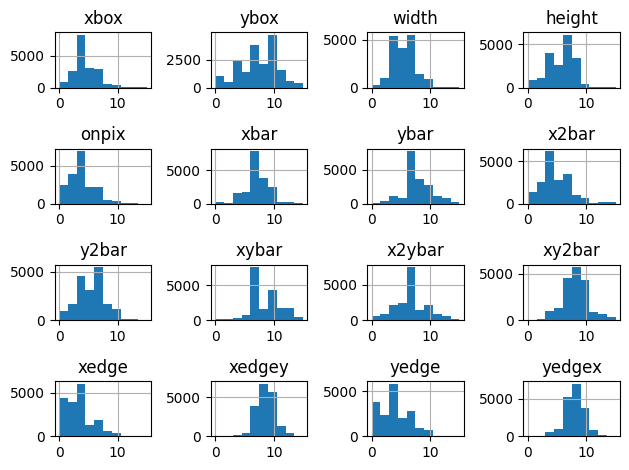

In [18]:
df.hist()
plt.tight_layout()

<Axes: >

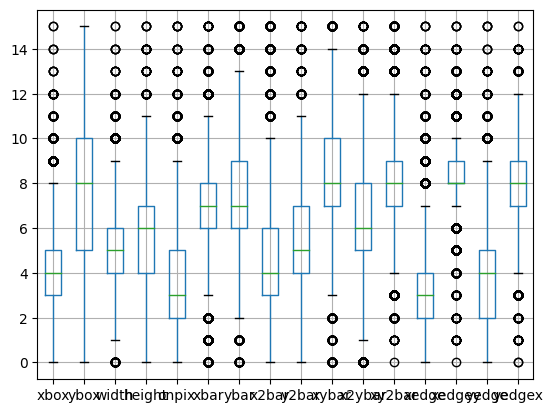

In [19]:
df.boxplot()

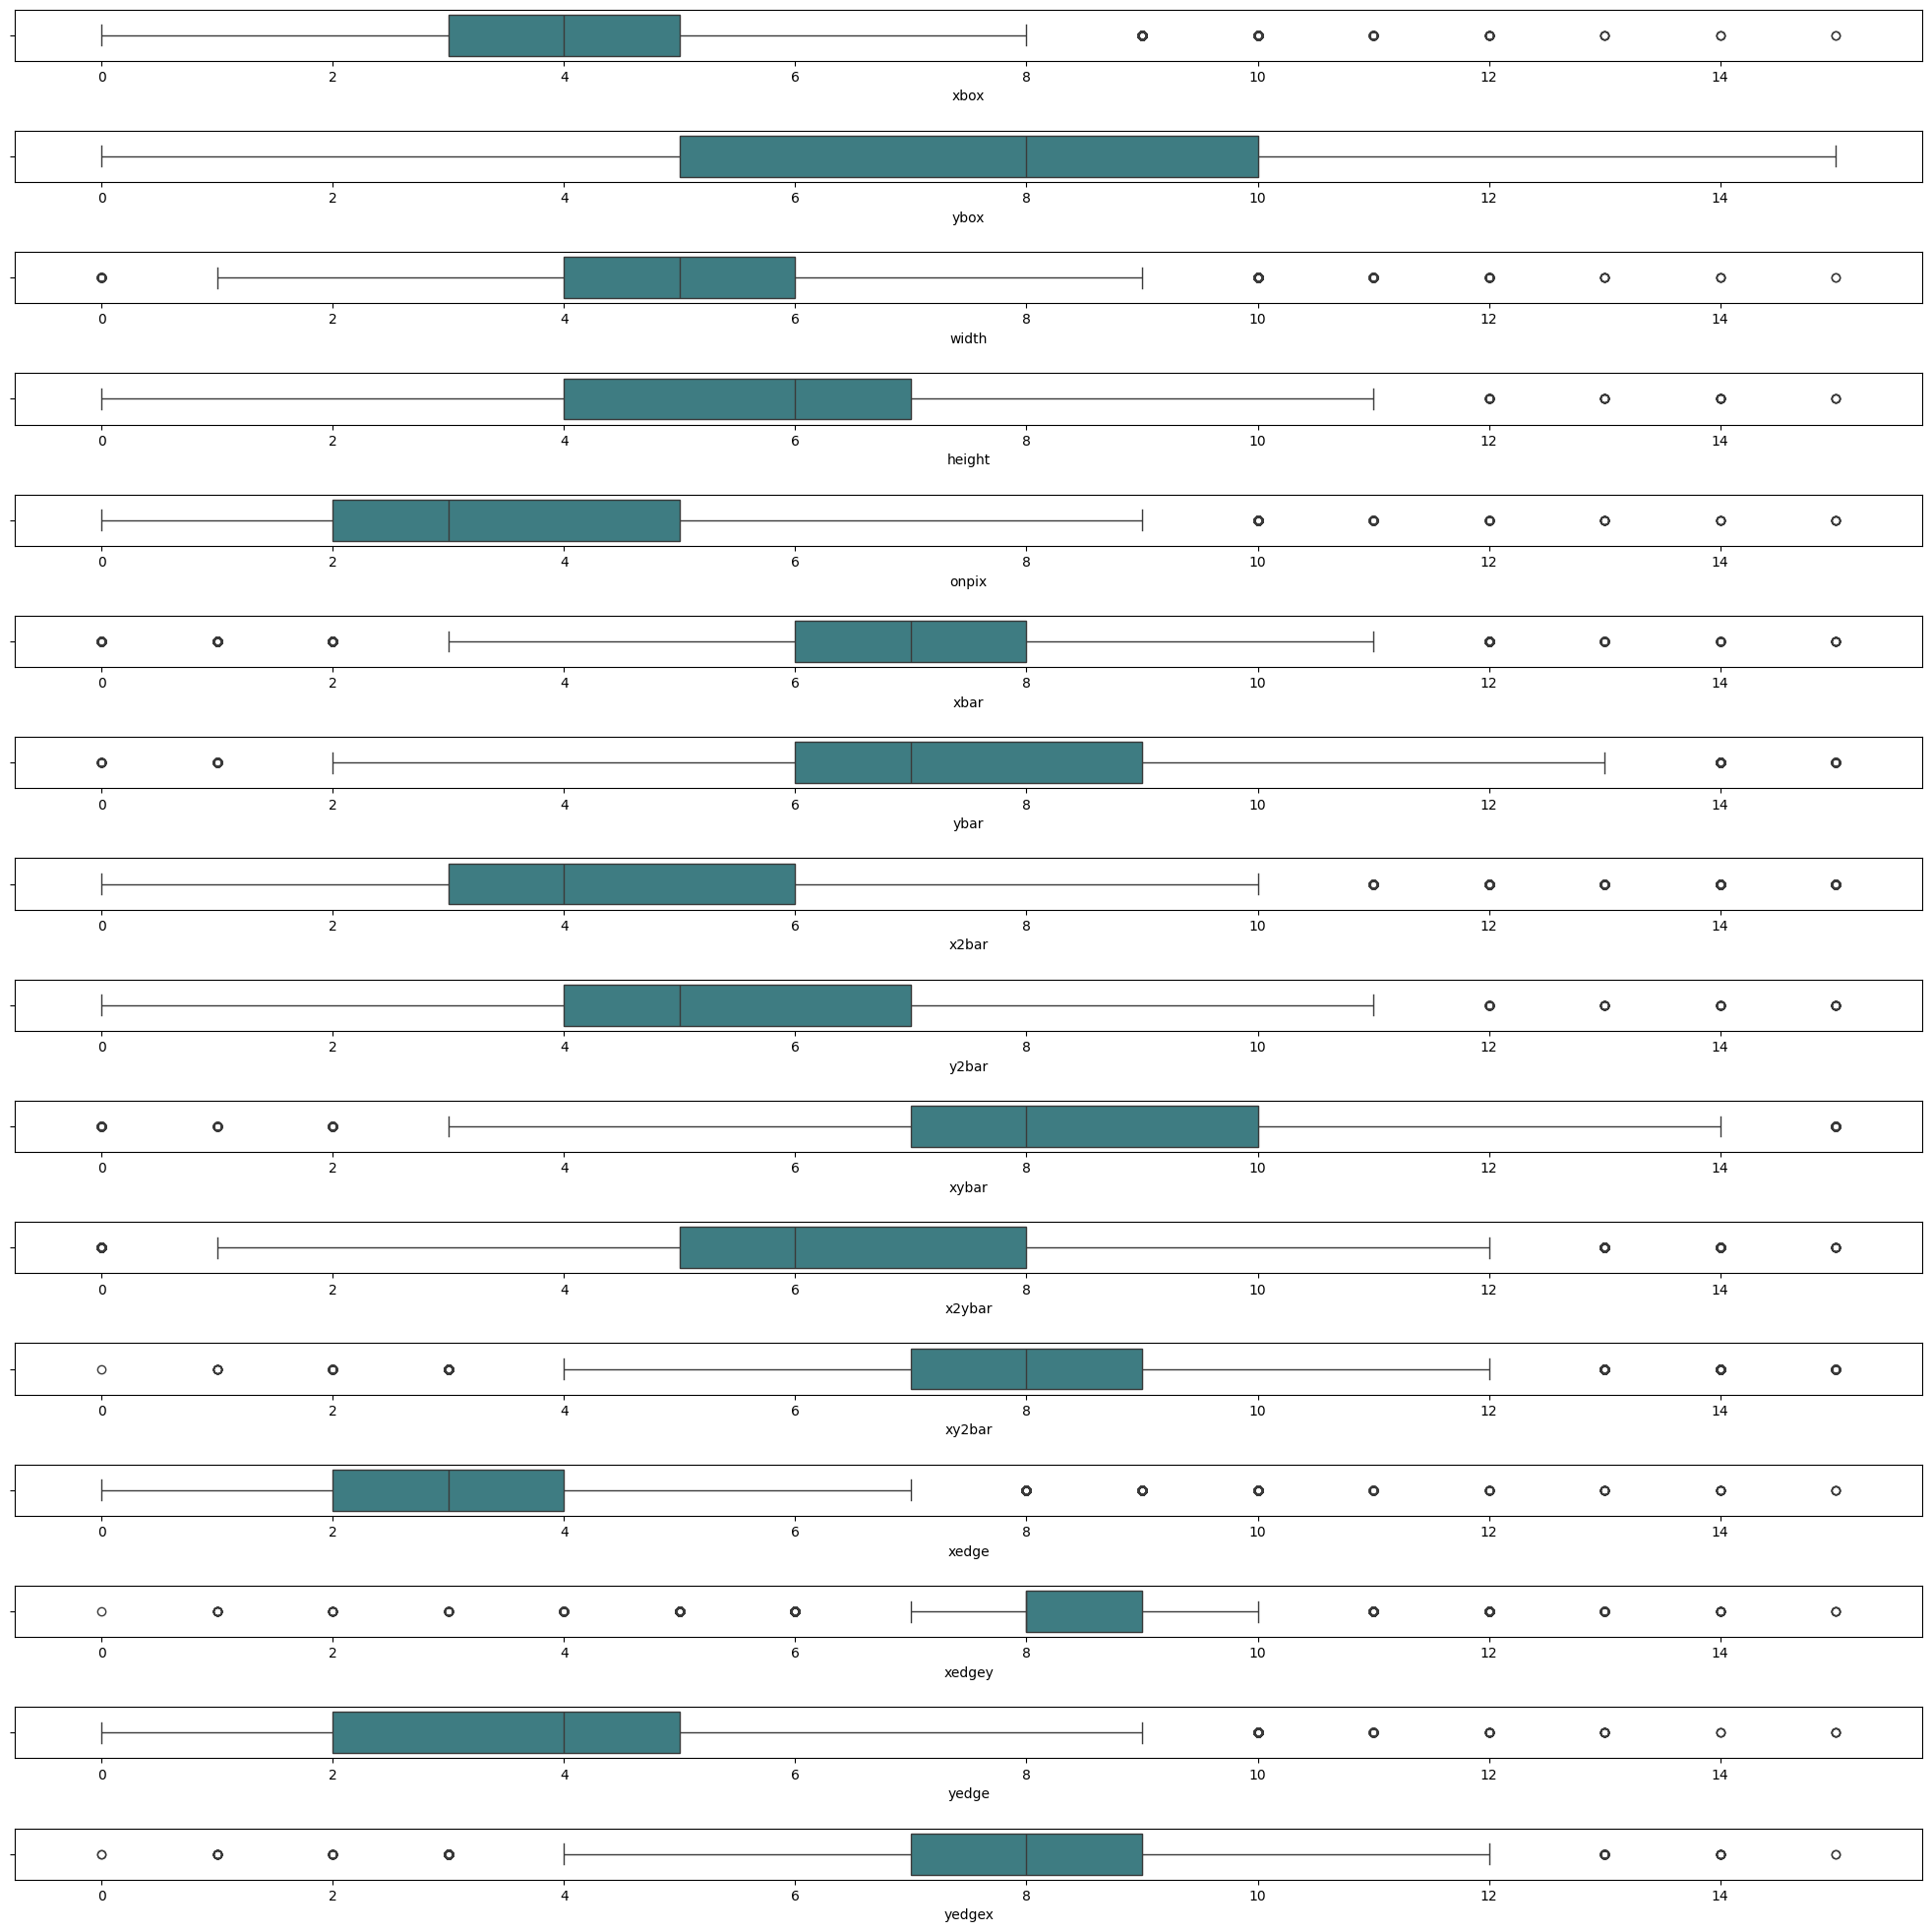

In [20]:
ot=df.copy()
fig, axes=plt.subplots(16,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='xbox',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='ybox',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='width',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='height',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='onpix',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='xbar',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='ybar',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='x2bar',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='y2bar',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='xybar',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='x2ybar',data=ot,palette='crest',ax=axes[10])
sns.boxplot(x='xy2bar',data=ot,palette='crest',ax=axes[11])
sns.boxplot(x='xedge',data=ot,palette='crest',ax=axes[12])
sns.boxplot(x='xedgey',data=ot,palette='crest',ax=axes[13])
sns.boxplot(x='yedge',data=ot,palette='crest',ax=axes[14])
sns.boxplot(x='yedgex',data=ot,palette='crest',ax=axes[15])
plt.tight_layout(pad=2.0)

In [21]:
#Outlier_detection function

In [22]:
def Outlier_detection (data, colname):
  q1 = data[colname].quantile(0.25)
  q3 = data[colname].quantile(0.75)
  iqr = q3-q1

  upper = q3+(1.5*iqr)
  lower = q1-(1.5*iqr)

  return lower, upper

In [23]:
Outlier_detection(df,"xbox")

(0.0, 8.0)

Text(0.5, 1.0, 'Before the outlier replace with upper extreme values')

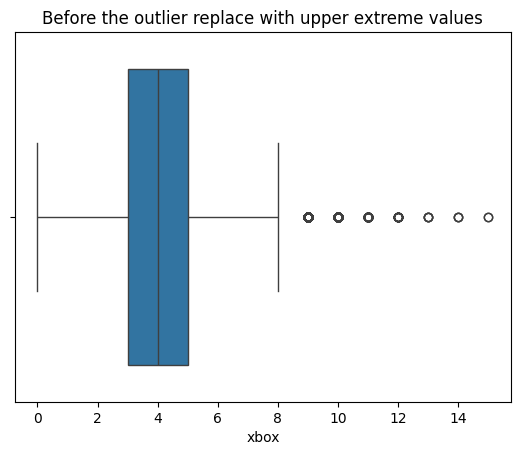

In [24]:
sns.boxplot(x = df ["xbox"])
plt.xlabel("xbox")
plt.title("Before the outlier replace with upper extreme values")

In [25]:
df.loc[df["xbox"]>8.0, "xbox"] = 8.0

Text(0.5, 1.0, 'After the outlier replaced with upper extreme values')

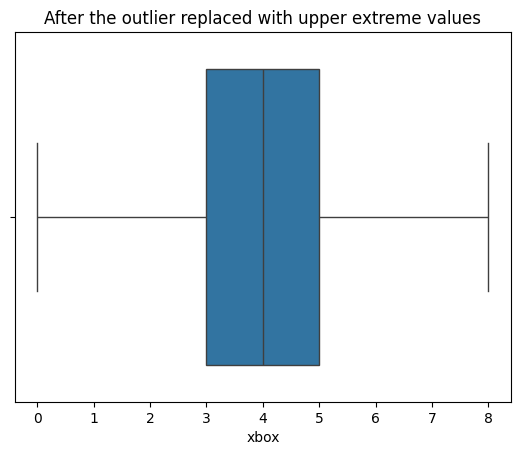

In [26]:
sns.boxplot(x = df ["xbox"])
plt.xlabel("xbox")
plt.title("After the outlier replaced with upper extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

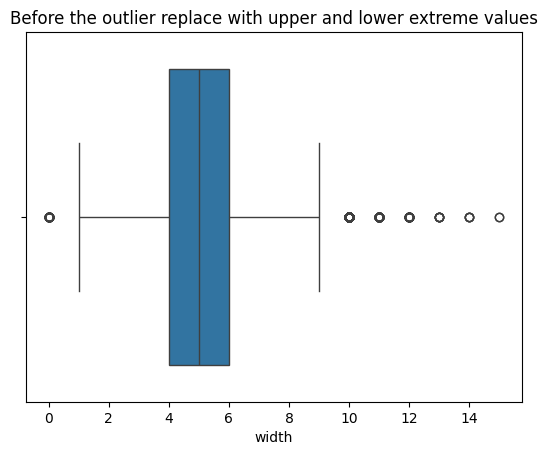

In [27]:
sns.boxplot(x = df["width"])
plt.xlabel("width")
plt.title("Before the outlier replace with upper and lower extreme values")

In [28]:
Outlier_detection(df, "width")

(1.0, 9.0)

In [29]:
df.loc[df["width"]>9.0, "width"] = 9.0

In [30]:
len(df.loc[df["width"]<1.0, "width"])

48

In [31]:
df.loc[df["width"]<1.0, "width"] = 1.0

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

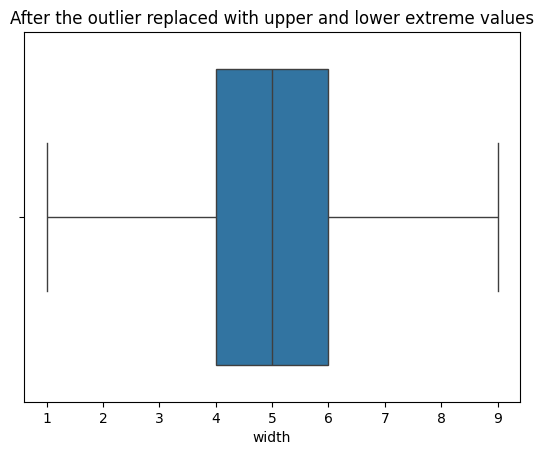

In [32]:
sns.boxplot(x = df["width"])
plt.xlabel("width")
plt.title("After the outlier replaced with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

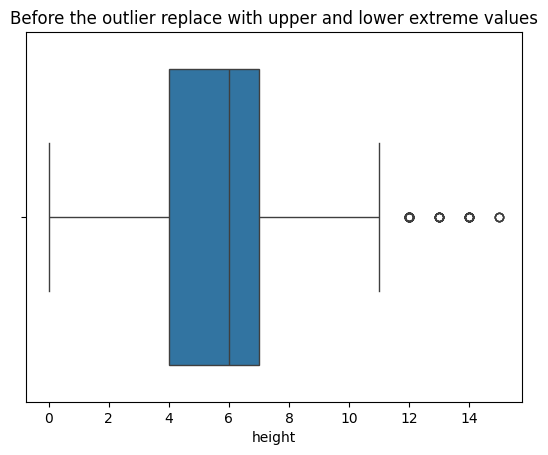

In [33]:
sns.boxplot(x = df["height"])
plt.xlabel("height")
plt.title("Before the outlier replace with upper and lower extreme values")

In [34]:
Outlier_detection(df, "height")

(-0.5, 11.5)

In [35]:
len(df.loc[df["height"]>11.5, "height"])

60

In [36]:
df.loc[df["height"]>11.5, "height"] = 11.5

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

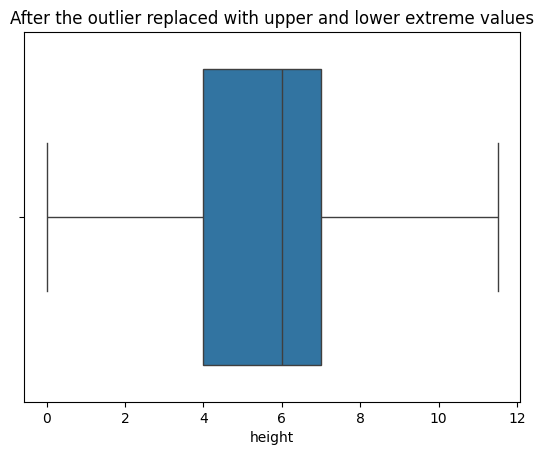

In [37]:
sns.boxplot(x = df["height"])
plt.xlabel("height")
plt.title("After the outlier replaced with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

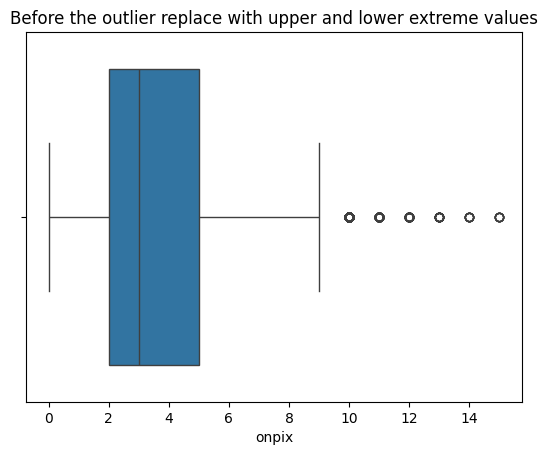

In [38]:
sns.boxplot(x = df["onpix"])
plt.xlabel("onpix")
plt.title("Before the outlier replace with upper and lower extreme values")

In [39]:
Outlier_detection(df, "onpix")

(-2.5, 9.5)

In [40]:
df.loc[df["onpix"]>9.5, "onpix"] = 9.5

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

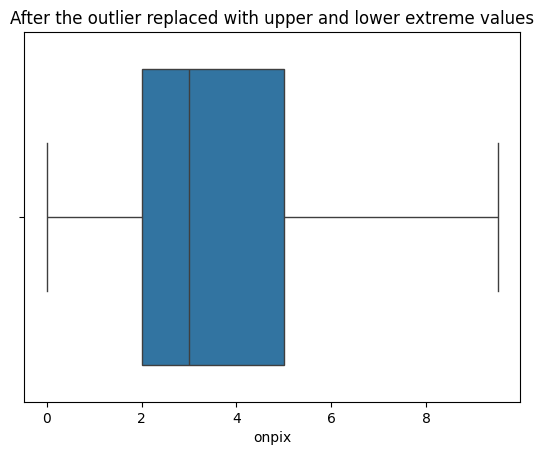

In [41]:
sns.boxplot(x = df["onpix"])
plt.xlabel("onpix")
plt.title("After the outlier replaced with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

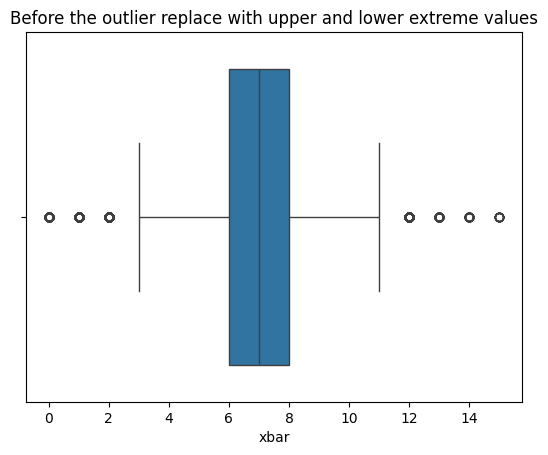

In [42]:
sns.boxplot(x = df["xbar"])
plt.xlabel("xbar")
plt.title("Before the outlier replace with upper and lower extreme values")

In [43]:
Outlier_detection(df, "xbar")

(3.0, 11.0)

In [44]:
df.loc[df["xbar"]>11.0, "xbar"] = 11.0

In [45]:
df.loc[df["xbar"]<3.0, "xbar"] = 3.0

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

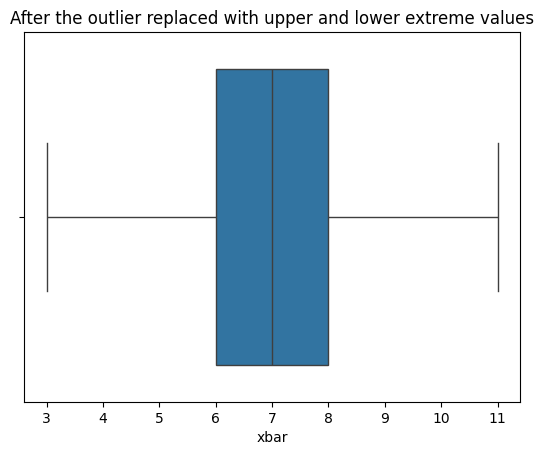

In [46]:
sns.boxplot(x = df["xbar"])
plt.xlabel("xbar")
plt.title("After the outlier replaced with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

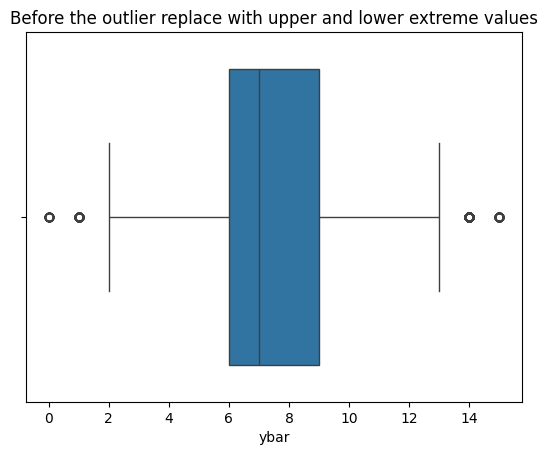

In [47]:
sns.boxplot(x = df["ybar"])
plt.xlabel("ybar")
plt.title("Before the outlier replace with upper and lower extreme values")

In [48]:
Outlier_detection(df, "ybar")

(1.5, 13.5)

In [49]:
df.loc[df["ybar"]>13.5, "ybar"] = 13.5

In [50]:
df.loc[df["ybar"]<1.5, "ybar"] = 1.5

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

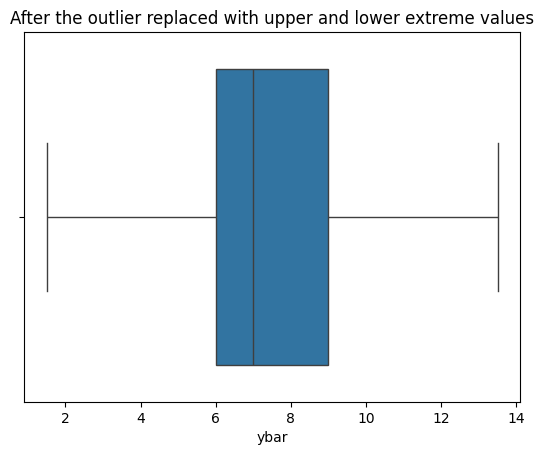

In [51]:
sns.boxplot(x = df["ybar"])
plt.xlabel("ybar")
plt.title("After the outlier replaced with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

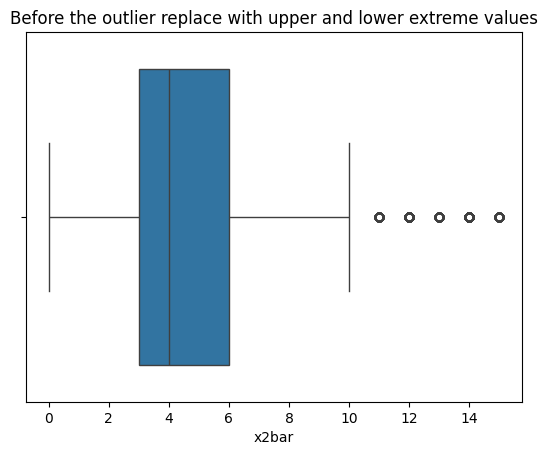

In [52]:
sns.boxplot(x = df["x2bar"])
plt.xlabel("x2bar")
plt.title("Before the outlier replace with upper and lower extreme values")

In [53]:
Outlier_detection(df, "x2bar")

(-1.5, 10.5)

In [54]:
df.loc[df["x2bar"]>10.5, "x2bar"] = 10.5

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

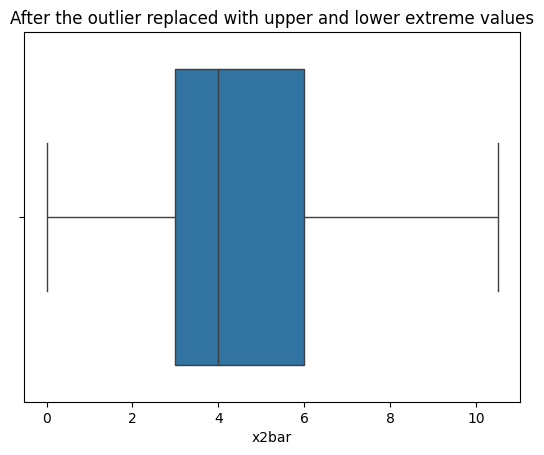

In [55]:
sns.boxplot(x = df["x2bar"])
plt.xlabel("x2bar")
plt.title("After the outlier replaced with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

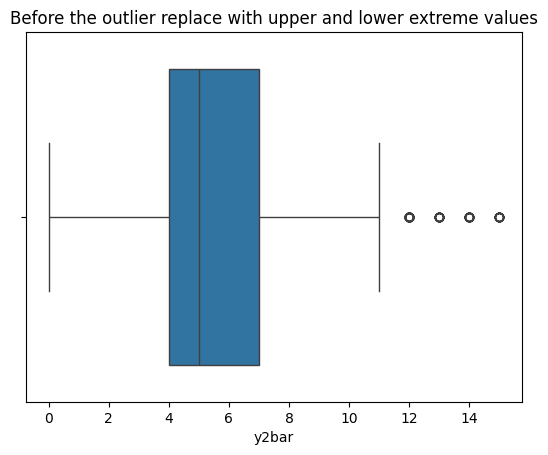

In [56]:
sns.boxplot(x = df["y2bar"])
plt.xlabel("y2bar")
plt.title("Before the outlier replace with upper and lower extreme values")

In [57]:
Outlier_detection(df, "y2bar")

(-0.5, 11.5)

In [58]:
df.loc[df["y2bar"]>11.5, "y2bar"] = 11.5

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

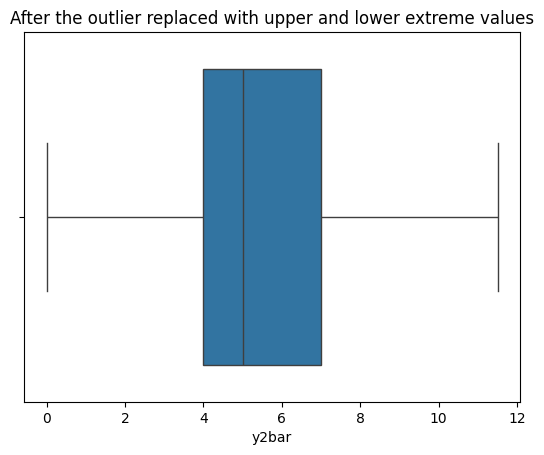

In [59]:
sns.boxplot(x = df["y2bar"])
plt.xlabel("y2bar")
plt.title("After the outlier replaced with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

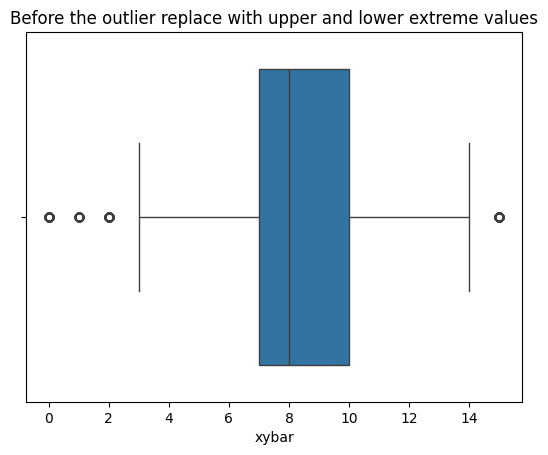

In [60]:
sns.boxplot(x = df["xybar"])
plt.xlabel("xybar")
plt.title("Before the outlier replace with upper and lower extreme values")

In [61]:
Outlier_detection(df, "xybar")

(2.5, 14.5)

In [62]:
df.loc[df["xybar"]>14.5, "xybar"] = 14.5

In [63]:
df.loc[df["xybar"]<2.5, "xybar"] = 2.5

Text(0.5, 1.0, 'After the outlier replace with upper and lower extreme values')

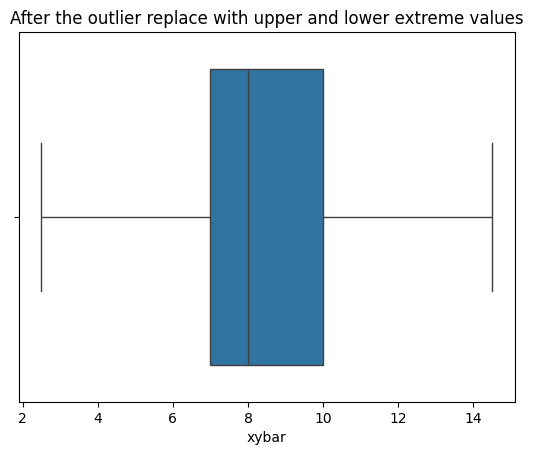

In [64]:
sns.boxplot(x = df["xybar"])
plt.xlabel("xybar")
plt.title("After the outlier replace with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

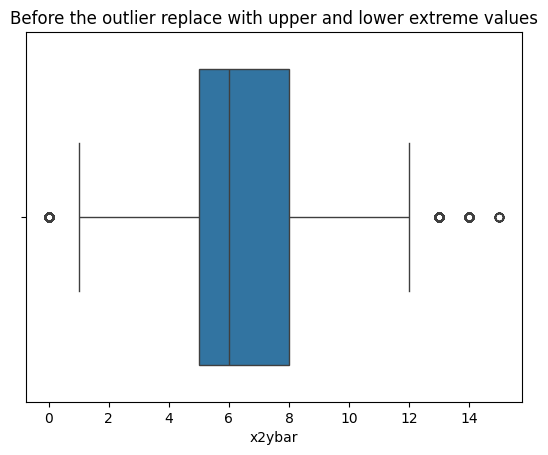

In [65]:
sns.boxplot(x = df["x2ybar"])
plt.xlabel("x2ybar")
plt.title("Before the outlier replace with upper and lower extreme values")

In [66]:
Outlier_detection(df, "x2ybar")

(0.5, 12.5)

In [67]:
df.loc[df["x2ybar"]>12.5, "x2ybar"] = 12.5

In [68]:
df.loc[df["x2ybar"]<0.5, "x2ybar"] = 0.5

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

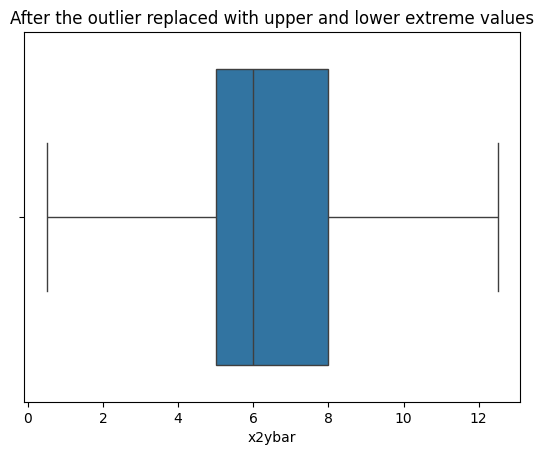

In [69]:
sns.boxplot(x = df["x2ybar"])
plt.xlabel("x2ybar")
plt.title("After the outlier replaced with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

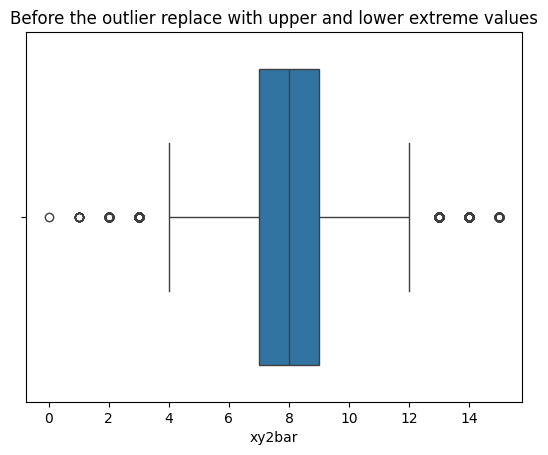

In [70]:
sns.boxplot(x = df["xy2bar"])
plt.xlabel("xy2bar")
plt.title("Before the outlier replace with upper and lower extreme values")

In [71]:
Outlier_detection(df, "xy2bar")

(4.0, 12.0)

In [72]:
df.loc[df["xy2bar"]>12.0, "xy2bar"] = 12.0

In [73]:
df.loc[df["xy2bar"]<4.0, "xy2bar"] = 4.0

Text(0.5, 1.0, 'After the outlier replace with upper and lower extreme values')

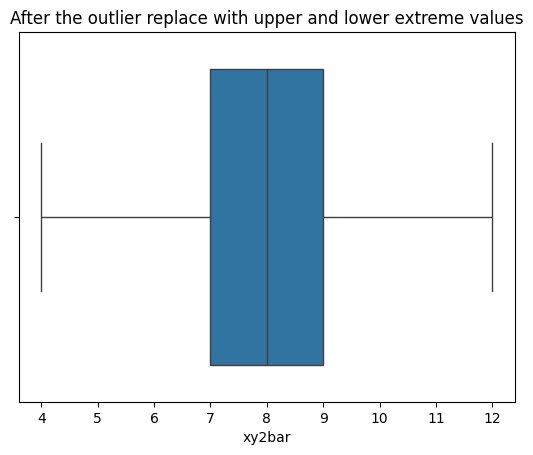

In [74]:
sns.boxplot(x = df["xy2bar"])
plt.xlabel("xy2bar")
plt.title("After the outlier replace with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

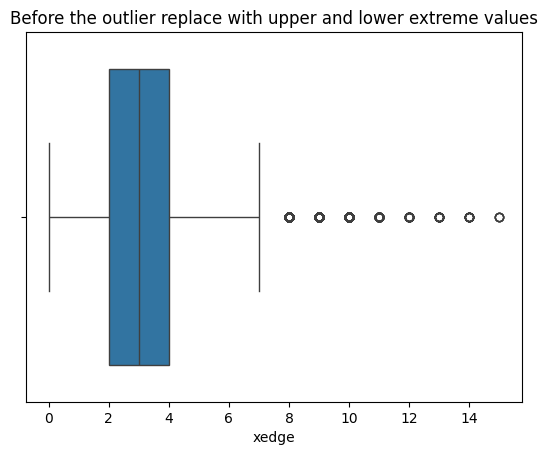

In [75]:
sns.boxplot(x = df["xedge"])
plt.xlabel("xedge")
plt.title("Before the outlier replace with upper and lower extreme values")

In [76]:
Outlier_detection(df, "xedge")

(-1.0, 7.0)

In [77]:
df.loc[df["xedge"]>7.0, "xedge"] = 7.0

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

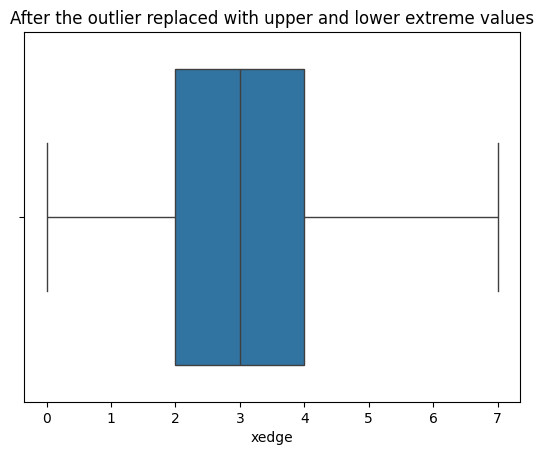

In [78]:
sns.boxplot(x = df["xedge"])
plt.xlabel("xedge")
plt.title("After the outlier replaced with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

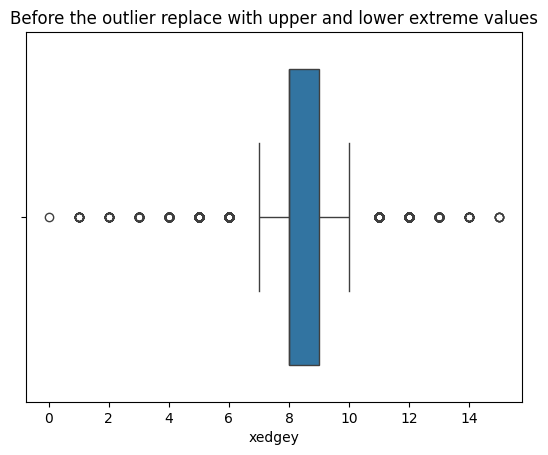

In [79]:
sns.boxplot(x = df["xedgey"])
plt.xlabel("xedgey")
plt.title("Before the outlier replace with upper and lower extreme values")

In [80]:
Outlier_detection(df, "xedgey")

(6.5, 10.5)

In [81]:
df.loc[df["xedgey"]>10.5, "xedgey"] = 10.5

In [82]:
df.loc[df["xedgey"]<6.5, "xedgey"] = 6.5

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

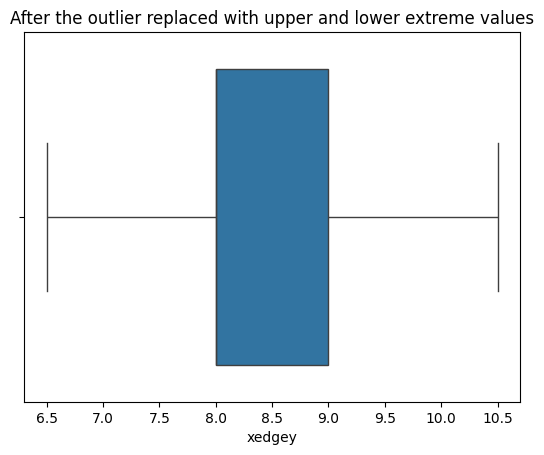

In [83]:
sns.boxplot(x = df["xedgey"])
plt.xlabel("xedgey")
plt.title("After the outlier replaced with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

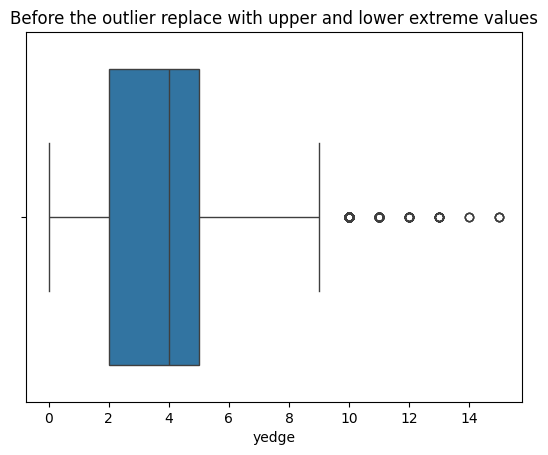

In [84]:
sns.boxplot(x = df["yedge"])
plt.xlabel("yedge")
plt.title("Before the outlier replace with upper and lower extreme values")

In [85]:
Outlier_detection(df, "yedge")

(-2.5, 9.5)

In [86]:
df.loc[df["yedge"]>9.5, "yedge"] = 9.5

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

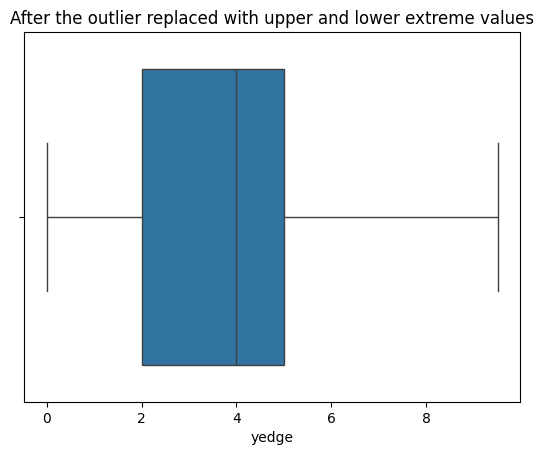

In [87]:
sns.boxplot(x = df["yedge"])
plt.xlabel("yedge")
plt.title("After the outlier replaced with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

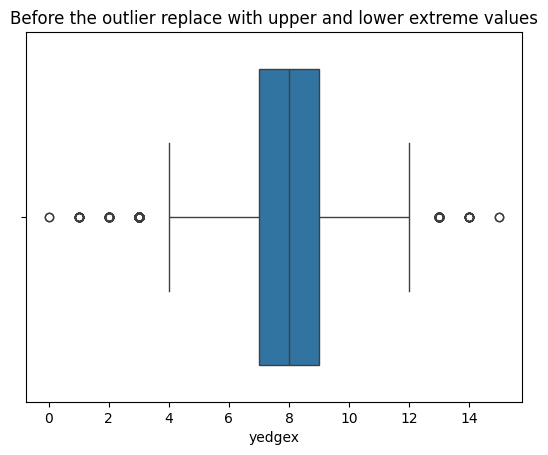

In [88]:
sns.boxplot(x = df["yedgex"])
plt.xlabel("yedgex")
plt.title("Before the outlier replace with upper and lower extreme values")

In [89]:
Outlier_detection(df, "yedgex")

(4.0, 12.0)

In [90]:
df.loc[df["yedgex"]>12.0, "yedgex"] = 12.0

In [91]:
df.loc[df["yedgex"]<4.0, "yedgex"] = 4.0

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

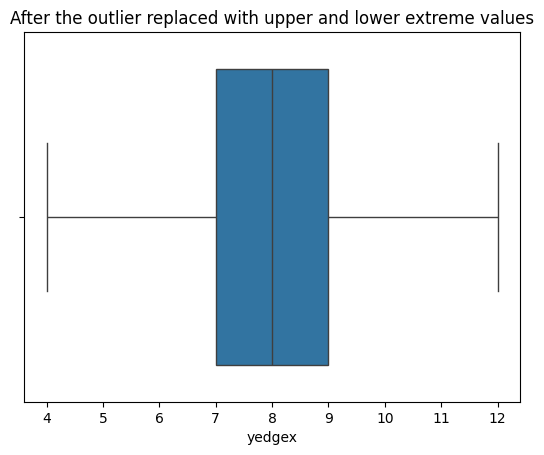

In [92]:
sns.boxplot(x = df["yedgex"])
plt.xlabel("yedgex")
plt.title("After the outlier replaced with upper and lower extreme values")

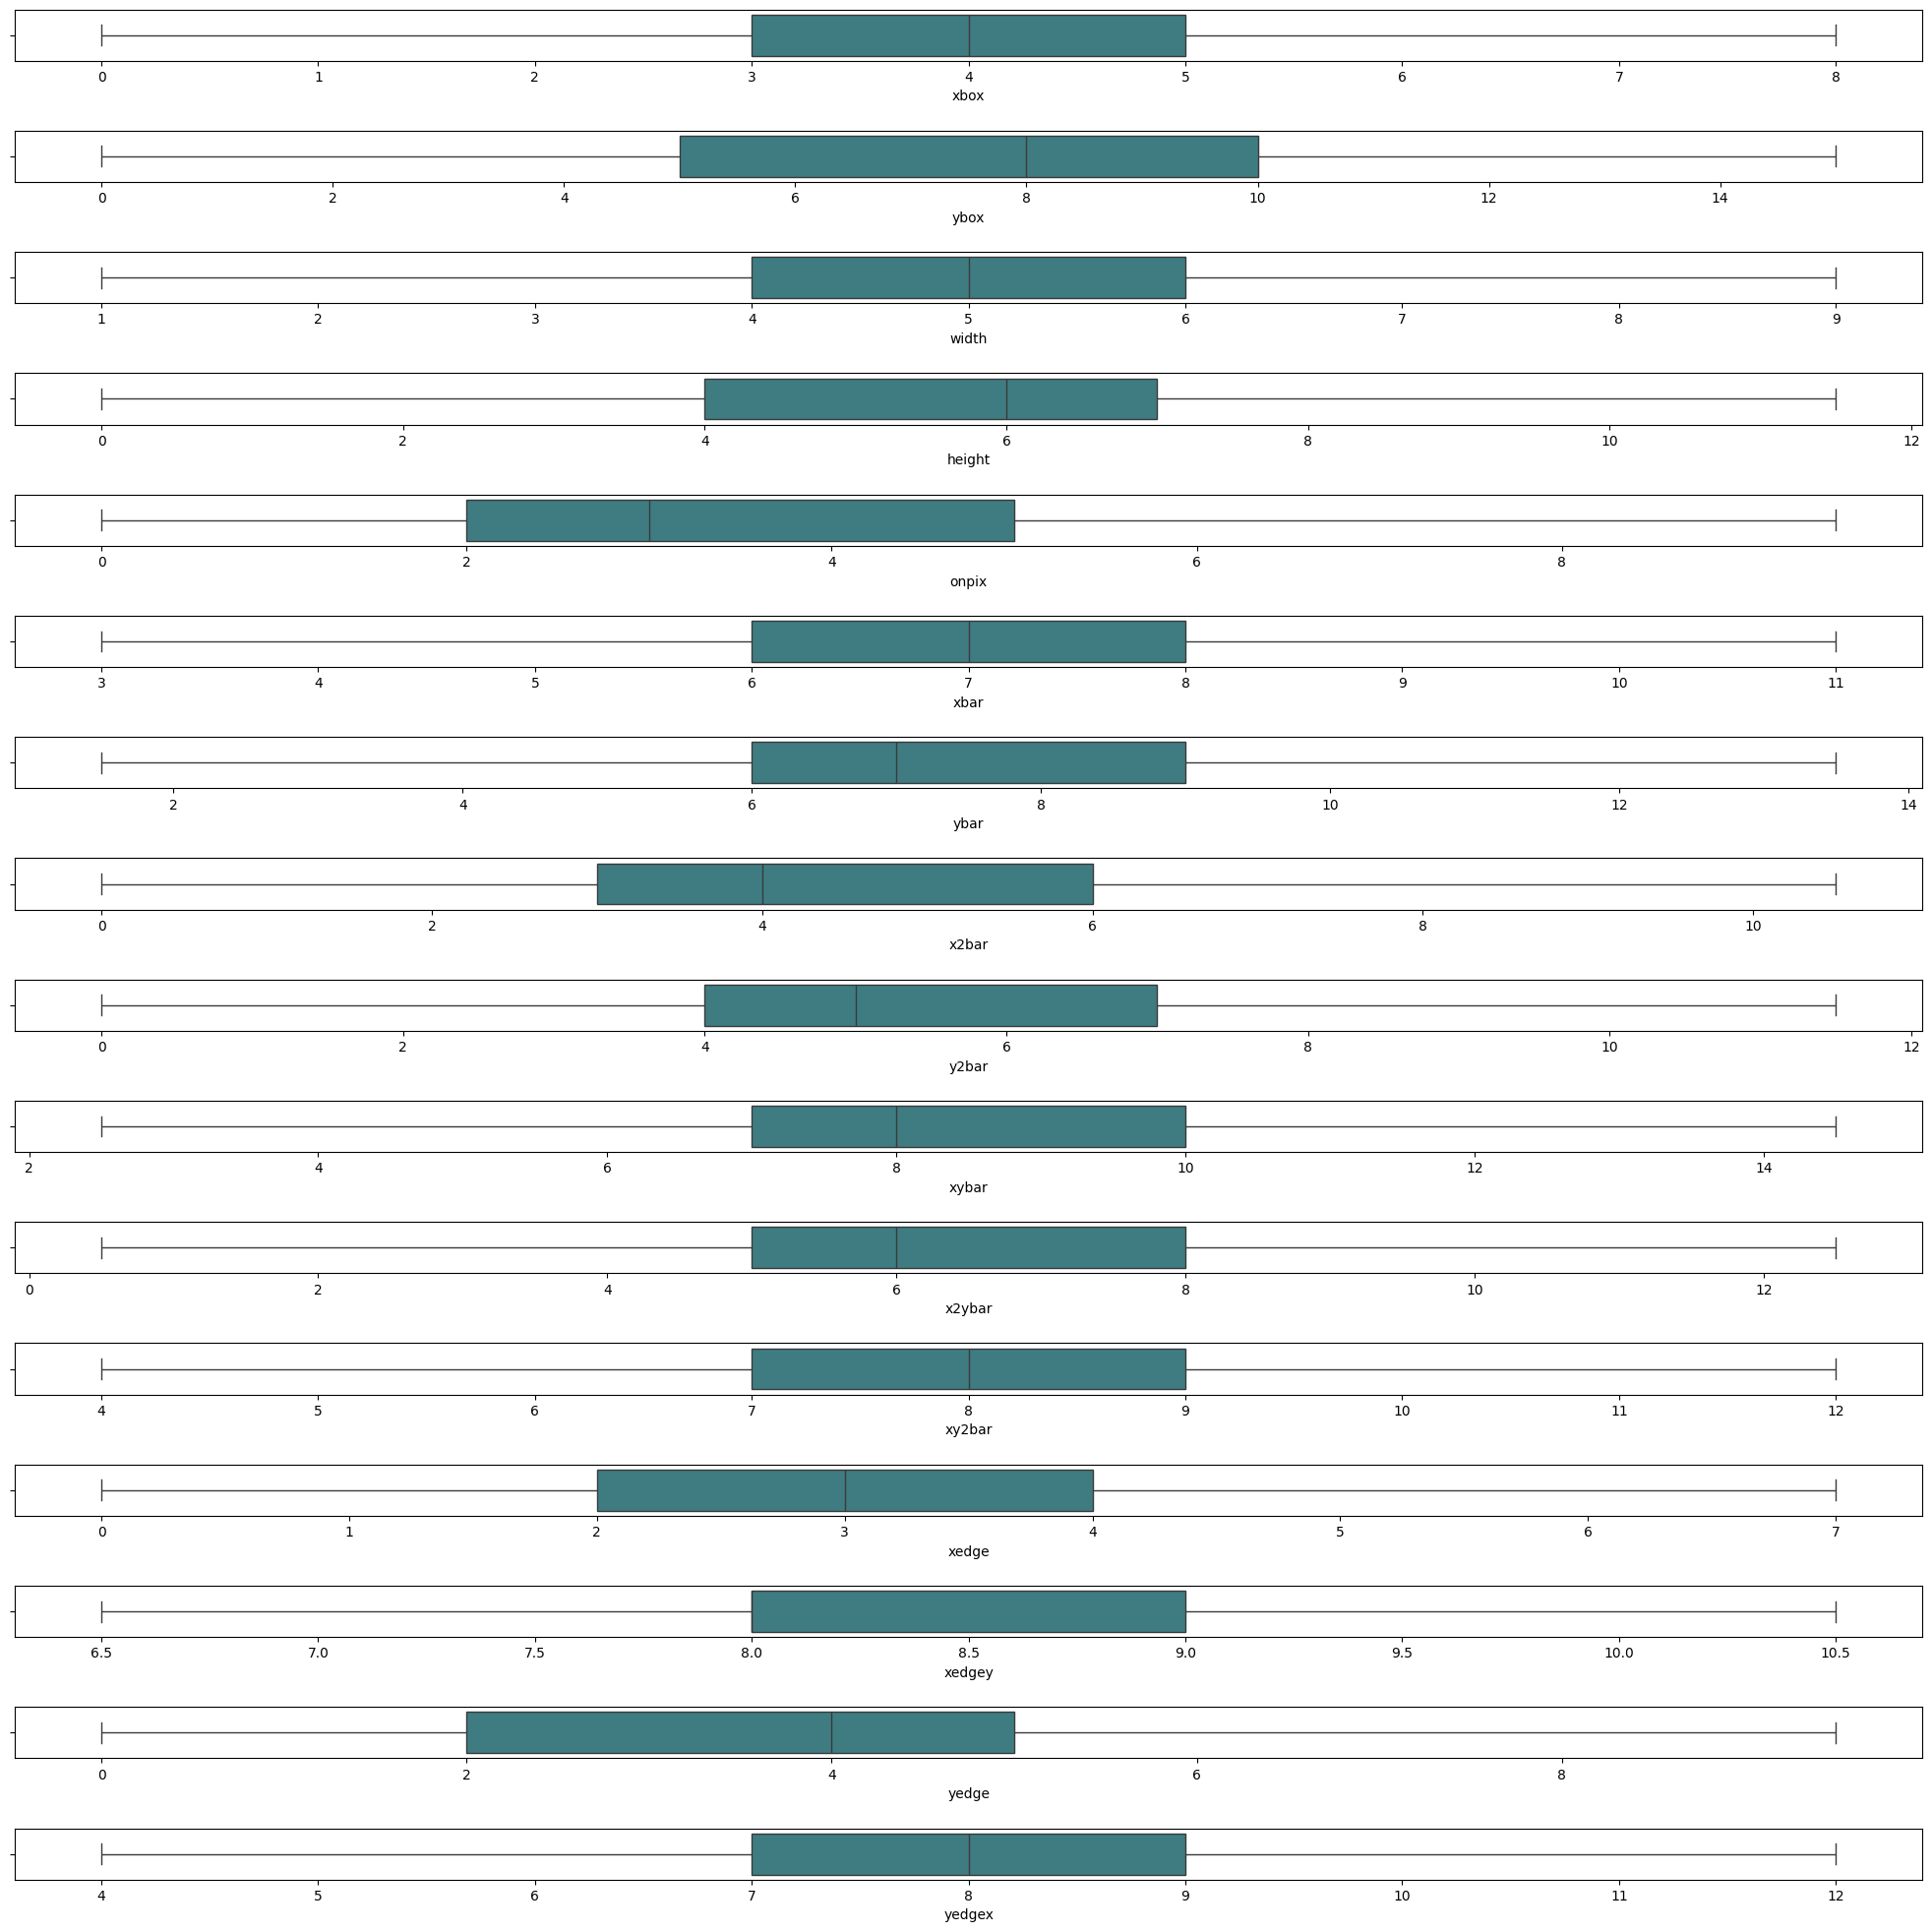

In [93]:
ot=df.copy()
fig, axes=plt.subplots(16,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='xbox',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='ybox',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='width',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='height',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='onpix',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='xbar',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='ybar',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='x2bar',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='y2bar',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='xybar',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='x2ybar',data=ot,palette='crest',ax=axes[10])
sns.boxplot(x='xy2bar',data=ot,palette='crest',ax=axes[11])
sns.boxplot(x='xedge',data=ot,palette='crest',ax=axes[12])
sns.boxplot(x='xedgey',data=ot,palette='crest',ax=axes[13])
sns.boxplot(x='yedge',data=ot,palette='crest',ax=axes[14])
sns.boxplot(x='yedgex',data=ot,palette='crest',ax=axes[15])
plt.tight_layout(pad=2.0)

In [94]:
#Scatter Plot and Correlation

In [95]:
#Label Enconding Methods

In [148]:
from sklearn.preprocessing import OneHotEncoder
import keras_tuner as kt

In [149]:
# One-hot encode the labels

In [150]:
x = df.drop(columns = ['letter'])
y = df['letter']

In [151]:
X_train, X_test, y_train_raw, y_test_raw = train_test_split(x, y, test_size=0.2, random_state=42)

In [152]:
num_classes = len(np.unique(y_train_raw))
y_train = tf.keras.utils.to_categorical(y_train_raw, num_classes)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_classes)

In [153]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [154]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [155]:
class MyHyperModel(kt.HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train.shape[1],)))
        model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=512, step=32), activation='relu'))
        model.add(Dense(num_classes, activation='softmax'))

        model.compile(optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model

In [156]:
# Instantiate the tuner

In [157]:
tuner = kt.Hyperband(
    MyHyperModel(),
    objective='val_accuracy',
    max_epochs=10,
    hyperband_iterations=2,
    directory='my_dir',
    project_name='my_project'
)

In [158]:
# Search for the best hyperparameters

In [159]:
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

Trial 60 Complete [00h 00m 25s]
val_accuracy: 0.8834951519966125

Best val_accuracy So Far: 0.9303649067878723
Total elapsed time: 00h 10m 44s


In [160]:
# Retrieve the best model

In [161]:
best_model = tuner.get_best_models(num_models=1)[0]

In [162]:
# Evaluate the best model

In [165]:
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

117/117 [==============================] - 0s 2ms/step - loss: 0.2397 - accuracy: 0.9234
Test Accuracy: 92.34%


In [166]:
# Make predictions

In [167]:
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

117/117 [==============================] - 0s 2ms/step


In [168]:
# Print classification report

In [169]:
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       144
           1       0.89      0.90      0.90       156
           2       0.98      0.87      0.92       147
           3       0.93      0.87      0.90       163
           4       0.84      0.92      0.87       144
           5       0.85      0.95      0.90       146
           6       0.79      0.91      0.84       173
           7       0.77      0.92      0.84       133
           8       0.97      0.91      0.94       108
           9       1.00      0.91      0.95       150
          10       0.95      0.93      0.94       149
          11       0.97      0.95      0.96       147
          12       0.92      0.98      0.95       143
          13       0.94      0.96      0.95       138
          14       0.92      0.93      0.92       131
          15       0.98      0.89      0.94       161
          16       0.97      0.88      0.92       145
          17       0.96    